In [1]:
import wave

In [2]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt


16000


C:\Users\konyo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\konyo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

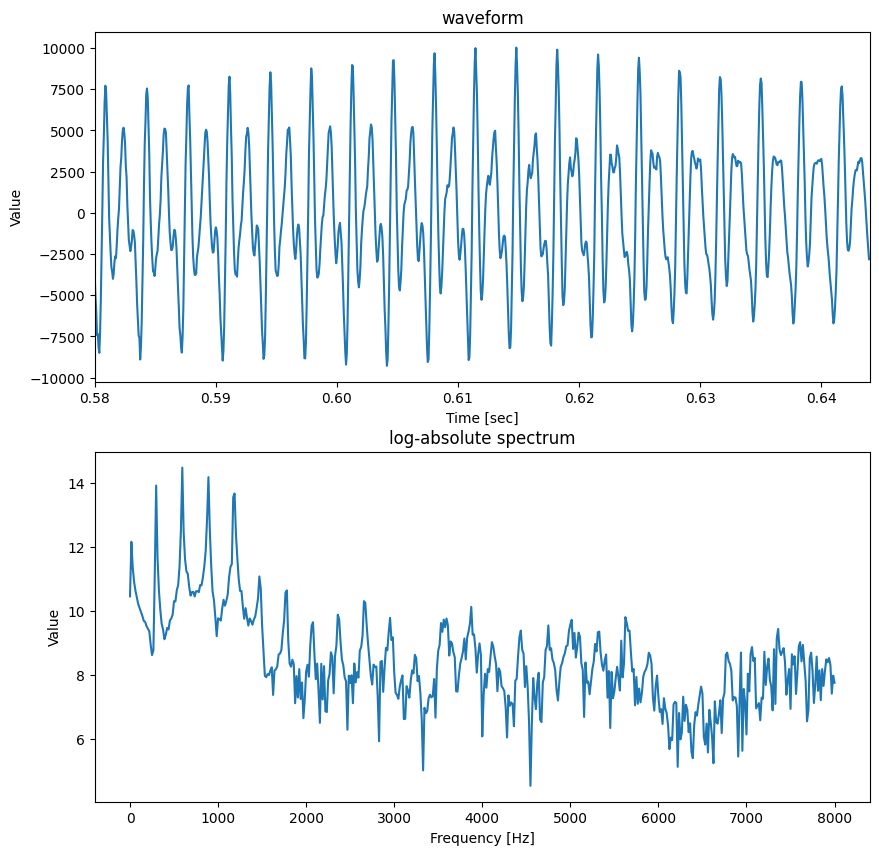

In [17]:
if __name__ == "__main__":
    #wav파일 열기
    wav_file = './data/wav/BASIC5000_0001.wav'
    
    
    #분석 시각.BASIC5000_0001.wav에서는 아래 시각에 음소 "o"를 발화
    target_time = 0.58
    
    #FFT(고속푸리에변환)한 범위의 샘플 수는 2의 제곱수여야 함.
    fft_size = 1024
    
    #시각화 결과 파일(png파일)
    out_plot = './spectrum.png'
    
    #wav파일을 열고, 아래 코드들을 수행한다
    with wave.open(wav_file) as wav:
        #샘플링 주파수[Hz]확인(샘플링 주파수: 1초 동안 샘플링하는 음압치의 개수)
        sampling_frequency = wav.getframerate()
        num_samples = wav.getnframes()
        print(sampling_frequency)
        #wav 데이터 읽기
        waveform = wav.readframes(wav.getnframes()) # readframes(): 데이터를 읽는 메서드, 데이터 샘플수를 파라미터로 취함
        #읽어온 데이터는 바이너리 값(16bit integer)이므로 수치(정수)로 변환
        waveform = np.frombuffer(waveform, dtype= np.int16)
        
    #분석 시각을 샘플 번호로 변환
    target_index = np.int(target_time * sampling_frequency)
    # FFT를 실행하는 구간만큼의 파형 데이터를 도출한다 
    frame = waveform[target_index: target_index + fft_size] # 슬라이싱 
    # FFT 적용
    spectrum = np.fft.fft(frame) # ? fft.fft > 
    # 진폭 스펙트럼 확인
    absolute = np.abs(spectrum)
    # 진폭 스펙트럼은 좌우 대칭이ㅡㅁ로 좌측 반만 이용한다
    absolute = absolute[:np.int(fft_size / 2) + 1]
    # 로그함수를 취하고 로그 진폭 스펙트럼을 계산(인간 인지 및 시각화에 용이)
    log_absolute = np.log(absolute + 1E-7) # 플로어링 처리
    
    #시간 파형과 로그 진폭 스펙트럼을 시각화한다
    #시각화 영역 생성
    plt.figure(figsize = (10, 10))
    #그림 영역을 종으로 2분할하여, 위쪽에 시간 파형을 그린다. 
    plt.subplot(2, 1, 1) 
    
    time_axis = target_time \
                + np.arange(fft_size) / sampling_frequency
    
    plt.plot(time_axis, frame)

    plt.title('waveform')
    plt.xlabel('Time [sec]')
    plt.ylabel('Value')


    plt.xlim([target_time, 
              target_time + fft_size / sampling_frequency])
    
    
    
    #2분할한 그림 영역 밑에 로그 진폭 스펙트럼을 그린다
    plt.subplot(2, 1, 2)
    #횡축(주파수 축)생성
    # 샘플링 정리 : 샘플링 주파수 F(S)로 기록한 음성에는 F(S)/2주파수의 정보만 포함되어있음. 
    # 나이키스트 주파수 : F(S) / 2 
    freq_axis = np.arange(np.int(fft_size / 2) + 1) * sampling_frequency / fft_size 
    #로그 진폭 스펙트럼 시각화
    plt.plot(freq_axis, log_absolute)
    #시각화한 그림의 제목과 횡축, 종축 라벨 정의
    plt.title('log-absolute spectrum')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Value')
    #횡축 표시 영역을 0~최대 주파수로 제한
    
    # 시각화된 결과물 저장
    plt.savefig(out_plot)